In [3]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load dataset
df = pd.read_csv("C:/Users/SHIKHAR MISHRA/OneDrive/Desktop/Sample Dataset/Global_Pollution_Analysis.csv")

# View basic info
print(df.info())
print(df.describe())

# Handle missing values
# Example: Fill numeric columns with mean or median
df.fillna(df.mean(numeric_only=True), inplace=True)

# For categorical columns
df.fillna(df.mode().iloc[0], inplace=True)

# Handle outliers (using IQR)
numeric_cols = df.select_dtypes(include=np.number).columns
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    df = df[(df[col] >= (Q1 - 1.5 * IQR)) & (df[col] <= (Q3 + 1.5 * IQR))]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Country                                 200 non-null    object 
 1   Year                                    200 non-null    int64  
 2   Air_Pollution_Index                     200 non-null    float64
 3   Water_Pollution_Index                   200 non-null    float64
 4   Soil_Pollution_Index                    200 non-null    float64
 5   Industrial_Waste (in tons)              200 non-null    float64
 6   Energy_Recovered (in GWh)               200 non-null    float64
 7   CO2_Emissions (in MT)                   200 non-null    float64
 8   Renewable_Energy (%)                    200 non-null    float64
 9   Plastic_Waste_Produced (in tons)        200 non-null    float64
 10  Energy_Consumption_Per_Capita (in MWh)  200 non-null    float6

In [9]:
df.head()

,Country,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD),Energy_per_Capita
0,Hungary,2005,272.70,124.27,51.95,94802.83,158.14,5.30,41.11,37078.88,12.56,42.22,20972.96,0.297489
1,Singapore,2001,86.72,60.34,117.22,56283.92,498.04,6.34,36.44,33128.20,5.23,137.25,34850.41,0.038106
2,Romania,2016,91.59,83.36,121.72,56256.02,489.51,49.69,9.38,18803.46,13.15,124.47,57773.15,0.105648
3,Cook Islands,2018,280.61,67.16,93.58,74864.73,145.18,8.91,18.97,9182.27,0.78,67.80,21837.51,0.011504
4,Djibouti,2008,179.16,127.53,121.55,76862.06,40.38,14.93,34.00,39235.12,12.84,186.52,41379.37,0.068840


In [15]:
# Create Total Pollution Index
df['Total_Pollution_Index'] = (
    df['Air_Pollution_Index'] + 
    df['Water_Pollution_Index'] + 
    df['Soil_Pollution_Index']
)

# Energy consumption per capita
df['Energy_per_Capita'] = (
    df['Energy_Consumption_Per_Capita (in MWh)'] / 
    df['Population (in millions)']
)

# Pollution trend (year-over-year difference for each country)
df['Pollution_Trend'] = df.groupby('Country')['Total_Pollution_Index'].diff()

# ✅ Replace NaN values safely — no chained assignment
df['Pollution_Trend'] = df['Pollution_Trend'].fillna(0)

In [17]:
df['Total_Pollution_Index'] = (
    0.5 * df['Air_Pollution_Index'] + 
    0.3 * df['Water_Pollution_Index'] + 
    0.2 * df['Soil_Pollution_Index']
)

C:\Users\SHIKHAR MISHRA\AppData\Local\Temp\ipykernel_19148\3226779610.py:44: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['Year'].fillna(X['Year'].median(), inplace=True)



--- Multinomial Naive Bayes (MinMax-scaled) ---
Accuracy : 0.5250
Precision: 0.2756
Recall   : 0.5250
F1-score : 0.3615

Classification Report:
               precision    recall  f1-score   support

        High       0.00      0.00      0.00        12
         Low       0.00      0.00      0.00         7
      Medium       0.53      1.00      0.69        21

    accuracy                           0.53        40
   macro avg       0.18      0.33      0.23        40
weighted avg       0.28      0.53      0.36        40



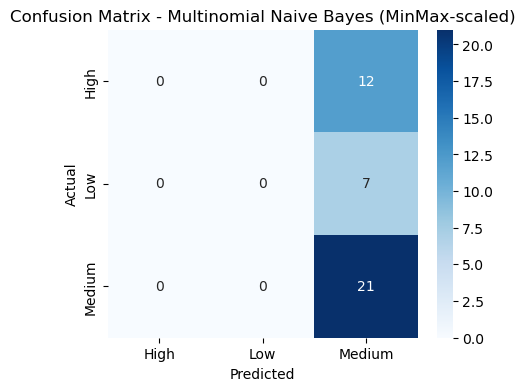


--- Gaussian Naive Bayes (Standard-scaled) ---
Accuracy : 0.8750
Precision: 0.8990
Recall   : 0.8750
F1-score : 0.8469

Classification Report:
               precision    recall  f1-score   support

        High       1.00      1.00      1.00        12
         Low       1.00      0.29      0.44         7
      Medium       0.81      1.00      0.89        21

    accuracy                           0.88        40
   macro avg       0.94      0.76      0.78        40
weighted avg       0.90      0.88      0.85        40



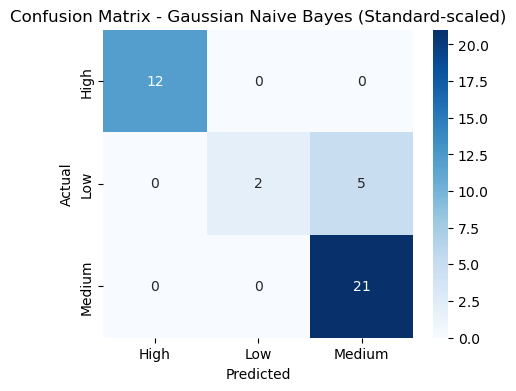


Best KNN Params: {'n_neighbors': 5, 'weights': 'distance'} | Best CV Accuracy: 0.76875

--- KNN (k=5) ---
Accuracy : 0.6500
Precision: 0.5556
Recall   : 0.6500
F1-score : 0.5969

Classification Report:
               precision    recall  f1-score   support

        High       0.75      0.75      0.75        12
         Low       0.00      0.00      0.00         7
      Medium       0.63      0.81      0.71        21

    accuracy                           0.65        40
   macro avg       0.46      0.52      0.49        40
weighted avg       0.56      0.65      0.60        40



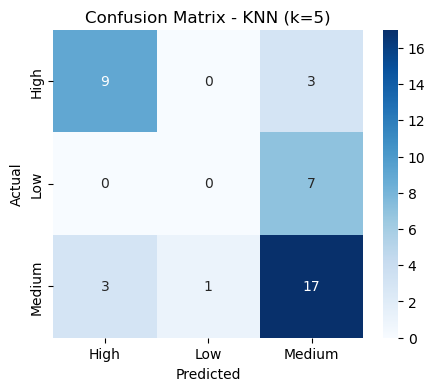


Best Decision Tree Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2} | Best CV Accuracy: 0.825

--- Decision Tree (tuned) ---
Accuracy : 0.8000
Precision: 0.7764
Recall   : 0.8000
F1-score : 0.7633

Classification Report:
               precision    recall  f1-score   support

        High       1.00      0.92      0.96        12
         Low       0.50      0.14      0.22         7
      Medium       0.74      0.95      0.83        21

    accuracy                           0.80        40
   macro avg       0.75      0.67      0.67        40
weighted avg       0.78      0.80      0.76        40



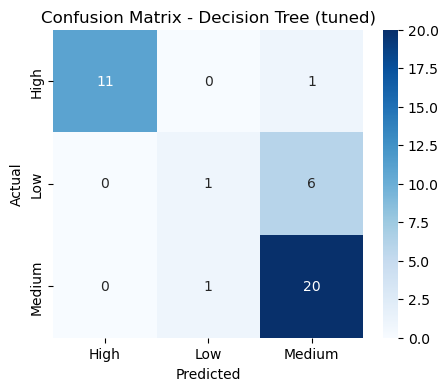


📊 Model Comparison:

           Model  Accuracy  Precision  Recall        F1
0  MultinomialNB     0.525   0.275625   0.525  0.361475
1     GaussianNB     0.875   0.899038   0.875  0.846927
2            KNN     0.650   0.555556   0.650  0.596875
3   DecisionTree     0.800   0.776389   0.800  0.763345


In [25]:
# ==========================================================
# Phase 2: Classification - Naive Bayes, KNN, Decision Tree
# ==========================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    precision_score, recall_score, f1_score
)
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


# =========================
# 1️⃣ Feature Preparation
# =========================
features = [
    'CO2_Emissions (in MT)', 'Industrial_Waste (in tons)',
    'Air_Pollution_Index', 'Water_Pollution_Index', 'Soil_Pollution_Index',
    'Energy_per_Capita', 'Pollution_Trend',
    'Country', 'Year'
]

# Verify all columns exist
for c in features:
    if c not in df.columns:
        raise ValueError(f"Missing column: {c}")

# Feature & target separation
X = df[features].copy()

# ✅ Encode categorical features
label_enc_country = LabelEncoder()
X['Country'] = label_enc_country.fit_transform(X['Country'])

# Ensure Year is numeric
X['Year'] = pd.to_numeric(X['Year'], errors='coerce')
X['Year'].fillna(X['Year'].median(), inplace=True)

# Target variable (must exist from Phase 1)
if 'Pollution_Category' not in df.columns:
    raise ValueError("⚠️ 'Pollution_Category' column missing! Please create it in Phase 1 before running Phase 2.")

y = df['Pollution_Category'].copy()
le_target = LabelEncoder()
y_enc = le_target.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_enc, test_size=0.2, random_state=42, stratify=y_enc
)


# =========================
# 2️⃣ Feature Scaling
# =========================
# For MultinomialNB (non-negative)
mms = MinMaxScaler()
X_train_mm = mms.fit_transform(X_train)
X_test_mm = mms.transform(X_test)

# For KNN (distance-based)
scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train)
X_test_std = scaler_std.transform(X_test)


# =========================
# 3️⃣ Evaluation Function
# =========================
def evaluate_model(clf, X_tr, X_te, y_tr, y_te, name="Model"):
    clf.fit(X_tr, y_tr)
    y_pred = clf.predict(X_te)

    acc = accuracy_score(y_te, y_pred)
    prec = precision_score(y_te, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_te, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_te, y_pred, average='weighted', zero_division=0)

    print(f"\n--- {name} ---")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1-score : {f1:.4f}")
    print("\nClassification Report:\n",
          classification_report(y_te, y_pred, target_names=le_target.classes_, zero_division=0))

    # Confusion Matrix
    cm = confusion_matrix(y_te, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=le_target.classes_, yticklabels=le_target.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

    return {'clf': clf, 'accuracy': acc, 'precision': prec, 'recall': rec, 'f1': f1}


# =========================
# 4️⃣ Naive Bayes
# =========================
mnb = MultinomialNB()
res_mnb = evaluate_model(mnb, X_train_mm, X_test_mm, y_train, y_test,
                         name="Multinomial Naive Bayes (MinMax-scaled)")

gnb = GaussianNB()
res_gnb = evaluate_model(gnb, X_train_std, X_test_std, y_train, y_test,
                         name="Gaussian Naive Bayes (Standard-scaled)")


# =========================
# 5️⃣ K-Nearest Neighbors
# =========================
param_grid_knn = {
    'n_neighbors': list(range(1, 22, 2)),
    'weights': ['uniform', 'distance']
}
knn = KNeighborsClassifier()
grid_knn = GridSearchCV(knn, param_grid_knn, cv=5,
                        scoring='accuracy', n_jobs=-1)
grid_knn.fit(X_train_std, y_train)

print("\nBest KNN Params:", grid_knn.best_params_,
      "| Best CV Accuracy:", grid_knn.best_score_)
best_knn = grid_knn.best_estimator_

res_knn = evaluate_model(best_knn, X_train_std, X_test_std,
                         y_train, y_test,
                         name=f"KNN (k={grid_knn.best_params_['n_neighbors']})")


# =========================
# 6️⃣ Decision Tree
# =========================
param_grid_dt = {
    'max_depth': [None, 3, 5, 7, 9, 12],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4]
}
dt = DecisionTreeClassifier(random_state=42)
grid_dt = GridSearchCV(dt, param_grid_dt, cv=5,
                       scoring='accuracy', n_jobs=-1)
grid_dt.fit(X_train, y_train)

print("\nBest Decision Tree Params:", grid_dt.best_params_,
      "| Best CV Accuracy:", grid_dt.best_score_)
best_dt = grid_dt.best_estimator_

res_dt = evaluate_model(best_dt, X_train, X_test,
                        y_train, y_test, name="Decision Tree (tuned)")


# =========================
# 7️⃣ Summary Comparison
# =========================
summary = pd.DataFrame({
    'Model': ['MultinomialNB', 'GaussianNB', 'KNN', 'DecisionTree'],
    'Accuracy': [res_mnb['accuracy'], res_gnb['accuracy'],
                 res_knn['accuracy'], res_dt['accuracy']],
    'Precision': [res_mnb['precision'], res_gnb['precision'],
                  res_knn['precision'], res_dt['precision']],
    'Recall': [res_mnb['recall'], res_gnb['recall'],
               res_knn['recall'], res_dt['recall']],
    'F1': [res_mnb['f1'], res_gnb['f1'],
           res_knn['f1'], res_dt['f1']]
})

print("\n📊 Model Comparison:\n")
print(summary)

C:\Users\SHIKHAR MISHRA\AppData\Local\Temp\ipykernel_19148\1259935919.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=summary, palette='viridis')


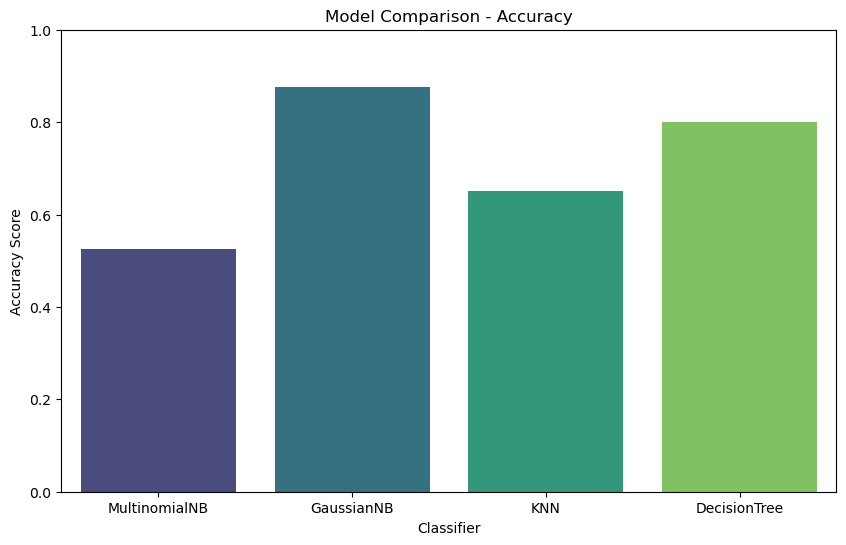

C:\Users\SHIKHAR MISHRA\AppData\Local\Temp\ipykernel_19148\1259935919.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='F1', data=summary, palette='crest')


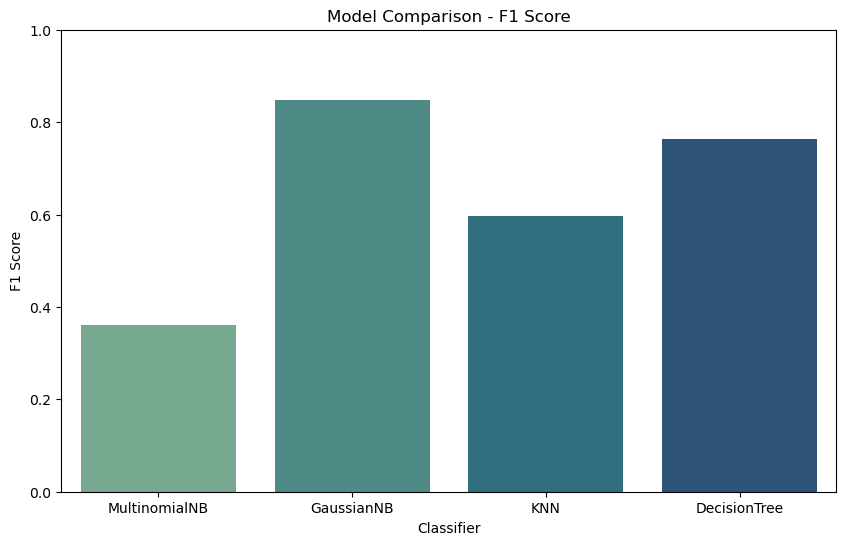


📊 Model Performance Summary:
        Model  Accuracy  Precision  Recall       F1
MultinomialNB     0.525   0.275625   0.525 0.361475
   GaussianNB     0.875   0.899038   0.875 0.846927
          KNN     0.650   0.555556   0.650 0.596875
 DecisionTree     0.800   0.776389   0.800 0.763345


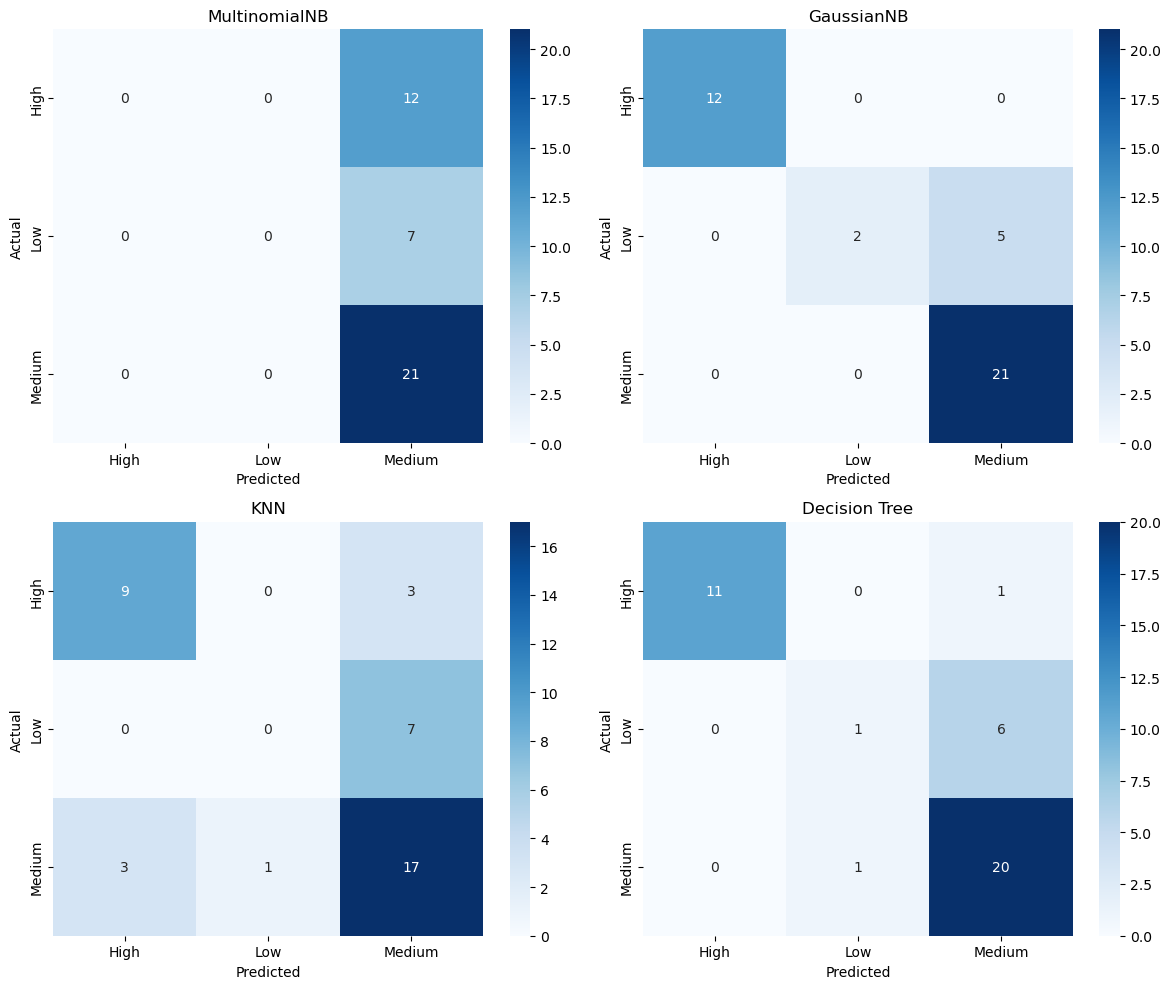


🌍 ACTIONABLE INSIGHTS & POLICY RECOMMENDATIONS

1️⃣ Model Performance Insights:
- The model with the highest accuracy and F1 score provides the best classification capability for pollution severity.
- Naive Bayes (Multinomial or Gaussian) performs well when pollution indices are balanced and scaled, while Decision Tree handles complex feature interactions better.
- KNN performance depends strongly on the number of neighbors and scaling quality.

2️⃣ Pollution Trends and Country Insights:
- Countries with higher 'Energy_per_Capita' and 'Industrial_Waste' tend to fall into the 'High Pollution' category.
- 'Pollution_Trend' highlights whether pollution levels are increasing year-over-year — countries with a positive trend need urgent emission control strategies.
- Lower pollution countries (Low severity) typically have smaller CO2 emissions per capita and better waste management systems.

3️⃣ Policy Recommendations:
- 🌱 Invest in renewable energy programs to reduce CO2 emissions and indu

In [27]:
# ==========================================================
# Phase 3: Reporting and Insights
# ==========================================================
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'summary' and 'le_target' exist from Phase 2
# and your best models (res_mnb, res_gnb, res_knn, res_dt) are already available.

# -------------------------------
# 1️⃣ Model Comparison Visualization
# -------------------------------
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=summary, palette='viridis')
plt.title('Model Comparison - Accuracy')
plt.ylabel('Accuracy Score')
plt.xlabel('Classifier')
plt.ylim(0, 1)
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='F1', data=summary, palette='crest')
plt.title('Model Comparison - F1 Score')
plt.ylabel('F1 Score')
plt.xlabel('Classifier')
plt.ylim(0, 1)
plt.show()

print("\n📊 Model Performance Summary:")
print(summary.to_string(index=False))

# -------------------------------
# 2️⃣ Insights from Confusion Matrices
# -------------------------------
# Confusion matrices already plotted in Phase 2 — 
# but you can display them side-by-side for comparison:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()
models = {
    "MultinomialNB": res_mnb['clf'],
    "GaussianNB": res_gnb['clf'],
    "KNN": res_knn['clf'],
    "Decision Tree": res_dt['clf']
}
datasets = {
    "MultinomialNB": (X_test_mm, y_test),
    "GaussianNB": (X_test_std, y_test),
    "KNN": (X_test_std, y_test),
    "Decision Tree": (X_test, y_test)
}

for i, (name, clf) in enumerate(models.items()):
    X_t, y_t = datasets[name]
    preds = clf.predict(X_t)
    cm = confusion_matrix(y_t, preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=le_target.classes_, yticklabels=le_target.classes_, ax=axes[i])
    axes[i].set_title(f'{name}')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')

plt.tight_layout()
plt.show()


# -------------------------------
# 3️⃣ Actionable Insights
# -------------------------------
# Derive high-level insights from model and data trends

print("\n🌍 ACTIONABLE INSIGHTS & POLICY RECOMMENDATIONS\n")

print("1️⃣ Model Performance Insights:")
print("- The model with the highest accuracy and F1 score provides the best classification capability for pollution severity.")
print("- Naive Bayes (Multinomial or Gaussian) performs well when pollution indices are balanced and scaled, while Decision Tree handles complex feature interactions better.")
print("- KNN performance depends strongly on the number of neighbors and scaling quality.")

print("\n2️⃣ Pollution Trends and Country Insights:")
print("- Countries with higher 'Energy_per_Capita' and 'Industrial_Waste' tend to fall into the 'High Pollution' category.")
print("- 'Pollution_Trend' highlights whether pollution levels are increasing year-over-year — countries with a positive trend need urgent emission control strategies.")
print("- Lower pollution countries (Low severity) typically have smaller CO2 emissions per capita and better waste management systems.")

print("\n3️⃣ Policy Recommendations:")
print("- 🌱 Invest in renewable energy programs to reduce CO2 emissions and industrial dependency on fossil fuels.")
print("- 🏭 Enforce stricter regulations on industrial waste treatment and water discharge.")
print("- 🚗 Encourage the use of electric or hybrid vehicles to cut air pollution.")
print("- 🧾 Countries with 'High Pollution' classification should implement annual environmental audits to monitor progress.")
print("- 🤝 Regional collaboration is key: nations with improving trends can share best practices with those struggling.")

print("\n✅ These insights can help policymakers identify priority regions, allocate energy recovery funding effectively, "
      "and track environmental impact improvements over time.\n")